# FE- Project1_Group

Submitted by  : Gurudayal Sahu & Kaya Niranjan Kumar Reddy

# Project -1

## Objective:


### Steps taken to build the Project:
    1. Data Quality
    2. Transformation of Data
    3. Derive EDA
    4. Feature Selection and Modeling
    5. Model Explanation


### To explore, analyse and model the data provided using following methods:
   1. Importing necessaty Python3 libraries
   2. Reading the data.
   3. Descriptive analytics
   4. Data cleansing
   5. Exploratory Data Analysis
   6. Feature Engineering
   7. Modelling
   8. Summary and Conclusion
   


  


## (Part#1) Importing Python libraries

In [1]:
# Importing  required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorama


## (Part#2) Reading the data

In [2]:
# let's load swiggy_orderss contain the information on Swiggy 

swiggy_orders_raw = pd.read_excel('Food Orders - Shared-1.xlsx')

swiggy_orders = swiggy_orders_raw.copy()

shape = swiggy_orders.shape
size = swiggy_orders.size

#### Using shape, we can find out Rows and columsn

print("---------------------------------------")
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".format(size, shape, shape[0]*shape[1]))

---------------------------------------
Size = 1260
Shape =(60, 21)
Shape[0] x Shape[1] = 1260


In [3]:
print(swiggy_orders.columns)

Index(['ID', 'Provider', 'DateTime', 'Distance', 'Status', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating'],
      dtype='object')


In [4]:
# let's inspect the first 5 rows from First Database 
swiggy_orders.head(5)

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


In [5]:
uniqueValues = swiggy_orders.nunique(dropna=False)

print("Count Unique values in each column including NaN")

print(uniqueValues)

Count Unique values in each column including NaN
ID                   57
Provider              1
DateTime             35
Distance              5
Status                3
Cost                 20
PromoCode             4
Delivery Time        38
Discount              5
Paid amount           2
Payment mode          4
Delivery charges      3
Surge charges         4
Packaging charges     2
ST                    2
Tip                   3
PureVeg               3
Items                 6
Membership            4
Type                  3
Rating                7
dtype: int64


In [6]:
# Does the swiggy_orders contain Null/Nans? (Missing Values), Where True = Yes and False =No
swiggy_orders.isnull().any()

ID                    True
Provider              True
DateTime             False
Distance              True
Status                True
Cost                 False
PromoCode             True
Delivery Time         True
Discount              True
Paid amount           True
Payment mode          True
Delivery charges     False
Surge charges         True
Packaging charges    False
ST                   False
Tip                   True
PureVeg               True
Items                 True
Membership            True
Type                  True
Rating                True
dtype: bool

In [7]:
# let's inspect the structure of the swiggy_orders
swiggy_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58 non-null     float64
 1   Provider           0 non-null      float64
 2   DateTime           60 non-null     object 
 3   Distance           59 non-null     float64
 4   Status             59 non-null     object 
 5   Cost               60 non-null     object 
 6   PromoCode          36 non-null     object 
 7   Delivery Time      59 non-null     object 
 8   Discount           24 non-null     float64
 9   Paid amount        1 non-null      float64
 10  Payment mode       59 non-null     object 
 11  Delivery charges   60 non-null     object 
 12  Surge charges      28 non-null     object 
 13  Packaging charges  60 non-null     object 
 14  ST                 60 non-null     object 
 15  Tip                24 non-null     float64
 16  PureVeg            59 non-nu

In [8]:
#Missing value check
missing = pd.DataFrame(swiggy_orders.apply(lambda x: np.sum(x.isnull(), axis=0)))
missing['percentage_missing'] = (missing.iloc[:,0]/swiggy_orders.shape[0])*100
print(missing)

                    0  percentage_missing
ID                  2            3.333333
Provider           60          100.000000
DateTime            0            0.000000
Distance            1            1.666667
Status              1            1.666667
Cost                0            0.000000
PromoCode          24           40.000000
Delivery Time       1            1.666667
Discount           36           60.000000
Paid amount        59           98.333333
Payment mode        1            1.666667
Delivery charges    0            0.000000
Surge charges      32           53.333333
Packaging charges   0            0.000000
ST                  0            0.000000
Tip                36           60.000000
PureVeg             1            1.666667
Items               1            1.666667
Membership          1            1.666667
Type                1            1.666667
Rating              3            5.000000


# Observations : 
Point#1 : The dataset contain 21 columns and 60 Rows

Point#2 : ### There are significant proportion of missing values  

--- "Provider" having no data,"Paid amount" with 1 record,so it can be dropped
--- Other features are significant proportion  with missing values like : "PromoCode ", "Discount","Surge charges" and "tip"

Point#3 :The variables in the data set are numeric with data types as  `float64` and other as Object.

------------------------------------------------
================================================
Point#4 : Since the Packaging Charges and ST having the same values across at 10 and 5 respectively, these two columns are also eligible for elimination.

Point#5 : One record is distorted/misaligned hence is eligible for elimination of the entire row (record # 24).


### (Part#3) : Descriptive Analysis

# eliminating the unwanted columns: Provider, Paid Amount, Packaging Charges, ST.

swiggy_orders_dropped = swiggy_orders
swiggy_orders_dropped.drop(['Provider','Paid amount','Packaging charges','ST'],
                           axis=1, inplace=True)

print(swiggy_orders_dropped)

swiggy_orders_dropped.drop(labels=None, axis=0, index=23, inplace=True, errors='raise')

print('AFTER ELIMINATION OF ROW # 24...')
print(swiggy_orders_dropped)


swiggy_orders_dropped.info()

swiggy_orders_dropped.describe()

In [9]:
swiggy_orders.describe()

,ID,Provider,Distance,Discount,Paid amount,Tip,Rating
count,58.000000,0.0,59.000000,24.000000,1.0,24.000000,57.000000
mean,52.655172,NaN,3.593220,33.750000,5.0,4.875000,2.403509
std,101.657587,NaN,1.340595,18.371173,NaN,0.612372,1.771396
min,1.000000,NaN,-2.000000,-25.000000,5.0,2.000000,0.000000
25%,13.250000,NaN,3.000000,25.000000,5.0,5.000000,1.000000
50%,27.500000,NaN,3.000000,25.000000,5.0,5.000000,3.000000
75%,41.750000,NaN,4.000000,50.000000,5.0,5.000000,4.000000
max,467.000000,NaN,6.000000,50.000000,5.0,5.000000,5.000000


We can validate our hypothesis and accordingly apply missing value treatment - replace NA as zero.


In [10]:
#Delivery time is having NaN value, that seems a wrong entry, so it can be removed.
swiggy_orders.dropna(subset=['Delivery Time'],inplace=True)

In [11]:
# let's inspect the structure of the swiggy_orders
swiggy_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58 non-null     float64
 1   Provider           0 non-null      float64
 2   DateTime           59 non-null     object 
 3   Distance           59 non-null     float64
 4   Status             59 non-null     object 
 5   Cost               59 non-null     object 
 6   PromoCode          35 non-null     object 
 7   Delivery Time      59 non-null     object 
 8   Discount           23 non-null     float64
 9   Paid amount        0 non-null      float64
 10  Payment mode       59 non-null     object 
 11  Delivery charges   59 non-null     object 
 12  Surge charges      27 non-null     object 
 13  Packaging charges  59 non-null     object 
 14  ST                 59 non-null     object 
 15  Tip                23 non-null     float64
 16  PureVeg            59 non-nu

In [12]:
swiggy_orders = swiggy_orders.drop(['Provider', 'Paid amount'], axis = 1)

In [13]:
# Counting duplicated in the swiggy_orders
swiggy_orders.duplicated().sum()

2

In [14]:
swiggy_orders.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [15]:
# To look on all the duplicates in the swiggy_orders
swiggy_orders.loc[swiggy_orders.duplicated(keep=False),:]

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
5,5.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
11,11.0,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,WALLET,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0
15,5.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
54,11.0,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,WALLET,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0


In [16]:
# Dropping the Duplicated records
swiggy_orders.drop_duplicates(inplace=True)

In [17]:
# After removing checking on Duplicated record 
swiggy_orders.loc[swiggy_orders.duplicated(),:]

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating


In [18]:


print("Number of missing Target label: ", swiggy_orders['Rating'].isnull().sum())

display(swiggy_orders[swiggy_orders['Rating'].isnull()])
swiggy_orders = swiggy_orders[swiggy_orders['Rating'].notna()]

print("Number of missing Target label: ", swiggy_orders['Rating'].isnull().sum())


Number of missing Target label:  2


,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
46,467.0,5-July-2020 8.38 PM,3.0,Delivered,400,PRO,5-July-2020 9.38 PM,NaN,COD,20,20,10,5,NaN,Y,PANEER;ROTI,BING,VEG,NaN
55,456.0,5-July-2020 9.38 AM,3.0,Delivered,220,BF,5-July-2020 9.58 AM,NaN,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,NaN


Number of missing Target label:  0


In [19]:
# Do we apply average value to the missing Target fields?
# Or drop the records?   The delivery time and order time mismatch and the rating is also missing.




# Data Integrity

In [20]:
# order time and delivery time check

swiggy_orders['DateTime'] = pd.to_datetime(swiggy_orders['DateTime'], format='%d-%B-%Y %H.%M %p')
swiggy_orders['Delivery Time'] = pd.to_datetime(swiggy_orders['Delivery Time'], format='%d-%B-%Y %H.%M %p')

display(swiggy_orders[['DateTime', 'Delivery Time']].dtypes)
swiggy_orders_integrity = swiggy_orders.copy()

print('Order time > Delivery time:')
display(swiggy_orders[swiggy_orders['Delivery Time'] < swiggy_orders['DateTime'] ])
print('Order time == Delivery time:')
display(swiggy_orders[swiggy_orders['Delivery Time'] == swiggy_orders['DateTime'] ])


DateTime         datetime64[ns]
Delivery Time    datetime64[ns]
dtype: object

Order time > Delivery time:


,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
4,423.0,2020-07-01 08:38:00,3.0,Cancelled,125,PRO,2020-07-01 07:38:00,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
35,310.0,2020-07-04 08:38:00,3.0,Delivered,500,NaN,2020-07-04 07:38:00,25.0,WALLET,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,5.0


Order time == Delivery time:


,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
5,5.0,2020-07-01 08:38:00,3.0,Cancelled,125,PRO,2020-07-01 08:38:00,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
28,25.0,2020-07-03 08:38:00,3.0,Cancelled,125,PRO,2020-07-03 08:38:00,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,2.0
51,45.0,2020-07-05 08:38:00,3.0,Cancelled,225,PRO,2020-07-05 08:38:00,NaN,COD,20,20,10,5,NaN,Y,DAL;ROTI,BING,VEG,3.0


In [21]:
# Displaying the Negative distance
display(swiggy_orders[swiggy_orders['Distance'] < 0  ])

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
59,51.0,2020-07-05 07:38:00,-2.0,Cancelled,250,PRO,2020-07-05 08:38:00,NaN,COD,20,20,10,5,NaN,Y,DAL;ROTI,BING,VEG,3.0


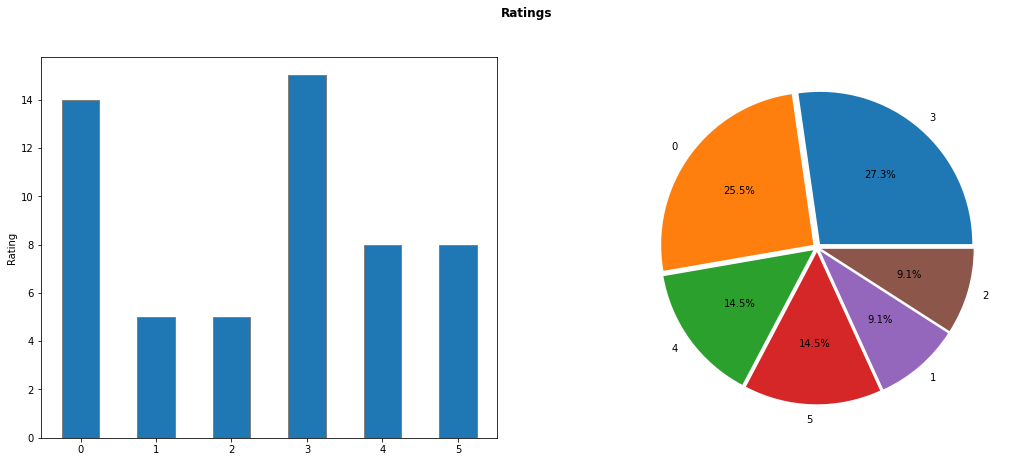

In [22]:
# rating check - zero value acceptable 

plt.figure(figsize=(18, 7))

plt.subplot(1,2,1)
swiggy_orders['Rating'] = swiggy_orders['Rating'].astype(int)
x = swiggy_orders['Rating'].value_counts().index
y = swiggy_orders['Rating'].value_counts()

plt.bar(x, y, width = 0.5, edgecolor ='grey', align='center')
plt.ylabel('Rating')

plt.subplot(1,2,2)
plt.pie(y, labels=x, autopct='%1.1f%%', explode=[0.03 for i in swiggy_orders['Rating'].value_counts().index])
plt.suptitle("Ratings", weight = 'bold')

plt.show()


In [23]:
# negative discount 
display(swiggy_orders[swiggy_orders['Discount'] < 0  ])
median_discount = swiggy_orders['Discount'].median()
swiggy_orders.at[42, 'Discount'] = median_discount


,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
42,56.0,2020-07-04 09:38:00,3.0,Delivered,300,NaN,2020-07-04 09:58:00,-25.0,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4


In [24]:
#Fill missing values
swiggy_orders['Discount'] = swiggy_orders['Discount'].fillna(0)
swiggy_orders['PromoCode'] = swiggy_orders['PromoCode'].fillna('NOPRO')
swiggy_orders['Surge charges'] = swiggy_orders['Surge charges'].fillna(0)
swiggy_orders['Tip'] = swiggy_orders['Tip'].fillna(0)
swiggy_orders.isnull().sum()

ID                   1
DateTime             0
Distance             0
Status               0
Cost                 0
PromoCode            0
Delivery Time        0
Discount             0
Payment mode         0
Delivery charges     0
Surge charges        0
Packaging charges    0
ST                   0
Tip                  0
PureVeg              0
Items                0
Membership           0
Type                 0
Rating               0
dtype: int64

In [25]:
#Actual delivery time 
thms = (swiggy_orders['Delivery Time'] - swiggy_orders['DateTime'])
swiggy_orders['Delivery_time'] = thms.dt.seconds/60
swiggy_orders.head(5)


,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,Delivery_time
0,1.0,2020-07-01 08:38:00,3.0,Delivered,300,PRO,2020-07-01 09:38:00,50.0,COD,20,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2,60.0
1,2.0,2020-07-01 08:38:00,3.0,Delivered,100,BF,2020-07-01 08:58:00,0.0,WALLET,20,0,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4,20.0
2,3.0,2020-07-01 09:00:00,6.0,Cancelled,250,PRO,2020-07-01 09:30:00,25.0,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0,30.0
3,4.0,2020-07-01 07:30:00,4.0,Delivered,550,PRO,2020-07-01 09:05:00,0.0,COD,25,10,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1,95.0
4,423.0,2020-07-01 08:38:00,3.0,Cancelled,125,PRO,2020-07-01 07:38:00,0.0,COD,20,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1,1380.0


In [26]:
#Bill amount from Cost - Discount + Delivery charges + Surge charges + Packaging charges	+ ST + Tip 
swiggy_orders['Cost'] = swiggy_orders['Cost'].astype(float)
swiggy_orders['Delivery charges'] = swiggy_orders['Delivery charges'].astype(float)
swiggy_orders['Surge charges'] = swiggy_orders['Surge charges'].astype(float)
swiggy_orders['ST'] = swiggy_orders['ST'].astype(float)
swiggy_orders['Packaging charges'] = swiggy_orders['Packaging charges'].astype(float)

bill_amount = swiggy_orders['Cost'] - swiggy_orders['Discount'] + swiggy_orders['Delivery charges'] + swiggy_orders['Surge charges'] + swiggy_orders['ST'] + swiggy_orders['Tip'] + swiggy_orders['Packaging charges']
swiggy_orders['Bill amount'] = bill_amount
swiggy_orders.head(5)


,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,...,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,Delivery_time,Bill amount
0,1.0,2020-07-01 08:38:00,3.0,Delivered,300.0,PRO,2020-07-01 09:38:00,50.0,COD,20.0,...,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2,60.0,285.0
1,2.0,2020-07-01 08:38:00,3.0,Delivered,100.0,BF,2020-07-01 08:58:00,0.0,WALLET,20.0,...,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4,20.0,140.0
2,3.0,2020-07-01 09:00:00,6.0,Cancelled,250.0,PRO,2020-07-01 09:30:00,25.0,CARD,25.0,...,10.0,5.0,5.0,Y,MIXVEG;RICE,BING,VEG,0,30.0,280.0
3,4.0,2020-07-01 07:30:00,4.0,Delivered,550.0,PRO,2020-07-01 09:05:00,0.0,COD,25.0,...,10.0,5.0,0.0,N,CHICKEN;BIRYANI,NO,MIX,1,95.0,600.0
4,423.0,2020-07-01 08:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 07:38:00,0.0,COD,20.0,...,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1,1380.0,160.0


In [27]:
swiggy_orders['Status'].replace('Delivered', 1, inplace=True)
swiggy_orders['Status'].replace('Cancelled', 0, inplace=True)
swiggy_orders.head(5)


,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,...,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,Delivery_time,Bill amount
0,1.0,2020-07-01 08:38:00,3.0,1,300.0,PRO,2020-07-01 09:38:00,50.0,COD,20.0,...,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,2,60.0,285.0
1,2.0,2020-07-01 08:38:00,3.0,1,100.0,BF,2020-07-01 08:58:00,0.0,WALLET,20.0,...,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4,20.0,140.0
2,3.0,2020-07-01 09:00:00,6.0,0,250.0,PRO,2020-07-01 09:30:00,25.0,CARD,25.0,...,10.0,5.0,5.0,Y,MIXVEG;RICE,BING,VEG,0,30.0,280.0
3,4.0,2020-07-01 07:30:00,4.0,1,550.0,PRO,2020-07-01 09:05:00,0.0,COD,25.0,...,10.0,5.0,0.0,N,CHICKEN;BIRYANI,NO,MIX,1,95.0,600.0
4,423.0,2020-07-01 08:38:00,3.0,0,125.0,PRO,2020-07-01 07:38:00,0.0,COD,20.0,...,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1,1380.0,160.0


In [28]:
swiggy_orders = pd.get_dummies(swiggy_orders, columns = ['PromoCode'], prefix = 'PromoCode')
swiggy_orders = pd.get_dummies(swiggy_orders, columns = ['Payment mode'], prefix = 'Paymode')
swiggy_orders = pd.get_dummies(swiggy_orders, columns = ['Membership'], prefix = 'Membership')


In [29]:
swiggy_orders.head(5)

,ID,DateTime,Distance,Status,Cost,Delivery Time,Discount,Delivery charges,Surge charges,Packaging charges,...,Bill amount,PromoCode_BF,PromoCode_NOPRO,PromoCode_PRO,Paymode_CARD,Paymode_COD,Paymode_WALLET,Membership_BING,Membership_BONG,Membership_NO
0,1.0,2020-07-01 08:38:00,3.0,1,300.0,2020-07-01 09:38:00,50.0,20.0,0.0,10.0,...,285.0,0,0,1,0,1,0,1,0,0
1,2.0,2020-07-01 08:38:00,3.0,1,100.0,2020-07-01 08:58:00,0.0,20.0,0.0,10.0,...,140.0,1,0,0,0,0,1,0,1,0
2,3.0,2020-07-01 09:00:00,6.0,0,250.0,2020-07-01 09:30:00,25.0,25.0,10.0,10.0,...,280.0,0,0,1,1,0,0,1,0,0
3,4.0,2020-07-01 07:30:00,4.0,1,550.0,2020-07-01 09:05:00,0.0,25.0,10.0,10.0,...,600.0,0,0,1,0,1,0,0,0,1
4,423.0,2020-07-01 08:38:00,3.0,0,125.0,2020-07-01 07:38:00,0.0,20.0,0.0,10.0,...,160.0,0,0,1,0,1,0,0,0,1


ID, Provider, DateTime, Cost, Delivery Time, Paid amount, Payment mode, Packaging charges, ST, Items, Type

Above features are candidates for elimination.

We can keep the following:
    Distance, Status, PromoCode, Discount, Surge Charges, Delivery charges, Tip, PureVeg, Membership, Rating